# PREDICTION USING K-NEAREST NEIGHBOR
   **NIM: 2101651786**
   
   **Name: Rio Rafelino**
   
   Below is my modified code from https://www.analyticsvidhya.com/blog/2018/08/k-nearest-neighbor-introduction-regression-python/

In [148]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [149]:
df = pd.read_csv('dataset.csv')
df

,id,height,age,weight
0,1,5.00,45,77
1,2,5.11,26,47
2,3,5.60,30,55
3,4,5.90,34,59
4,5,4.80,40,72
5,6,5.80,36,60
6,7,5.30,19,40
7,8,5.80,28,60
8,9,5.50,23,45
9,10,5.60,32,58


In [168]:
# split data menjadi 9 data untuk training dan 1 data untuk validation
train, valid = train_test_split(df, test_size = 0.1)

# buat objek minmaxscaler dengan range normalisasi 0-1
scaler = MinMaxScaler(feature_range=(0, 1))

# untuk x_train, drop kolom id dan weight, lalu fit transform, dan reshape menjadi batch (-1,2)
x_train = train.drop(columns=['id', 'weight'], axis = 1)
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled).values.reshape(-1,2)

# untuk y_train, ambil kolom weight
y_train = train['weight']

# lakukan hal yang sama pada validation data, bedanya hanya transform jangan di fit lagi
x_valid = valid.drop(columns=['id', 'weight'], axis = 1)
x_valid_scaled = scaler.transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled).values.reshape(-1,2)

y_valid = valid['weight']
x_train

C:\Users\RioRafelino\Anaconda3\envs\tf2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.63636364, 0.15384615],
       [1.        , 0.57692308],
       [0.        , 0.80769231],
       [0.90909091, 0.65384615],
       [0.28181818, 0.26923077],
       [0.18181818, 1.        ],
       [0.72727273, 0.5       ],
       [0.45454545, 0.        ],
       [0.72727273, 0.42307692]])

In [169]:
# input test data
x_test = pd.read_csv('test.csv')
x_test = x_test.drop(columns=['id', 'weight'], axis = 1)
x_test_scaled = scaler.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scaled).iloc[10].values.reshape(-1,2)
x_test

C:\Users\RioRafelino\Anaconda3\envs\tf2\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


array([[0.63636364, 0.73076923]])

## Looking for the best K value
As the data preprocessing is done, now we need to look for the best k value

I use two method:

1. train the model multiple times, and validate it with validation data, then count the RMSE error. The model with lowest RMSE error will be picked as the best K value
2. using SKLearn Library

In [178]:
rmse_val = [] #to store rmse values for different k
best_model = None
# inisialisasi best_error dengan worst case
best_error = 1000
for K in range(9):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred = model.predict(x_valid) #make prediction on test set
    error = sqrt(mean_squared_error(y_valid,pred)) #calculate rmse
    if(error < best_error):
        best_model = model
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 5.0
RMSE value for k=  2 is: 3.5
RMSE value for k=  3 is: 2.6666666666666643
RMSE value for k=  4 is: 2.0
RMSE value for k=  5 is: 4.600000000000001
RMSE value for k=  6 is: 7.166666666666664
RMSE value for k=  7 is: 8.0
RMSE value for k=  8 is: 4.875
RMSE value for k=  9 is: 3.0


<AxesSubplot:>

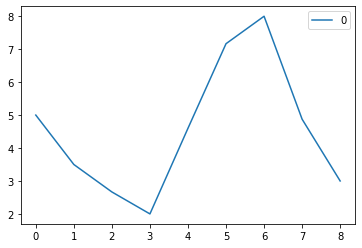

In [179]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [180]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors':[1,2,3,4,5,6,7]}

knn = neighbors.KNeighborsRegressor()

model = GridSearchCV(knn, params, cv=5)
model.fit(x_train, y_train)
model.best_params_

C:\Users\RioRafelino\Anaconda3\envs\tf2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'n_neighbors': 1}

In [181]:
pred = best_model.predict(x_test)
pred

array([57.])